# Assess termporal irrevesibility
- by changing the "temp. lapse rate" and the "prcp. factor ...
--> actually less straightforward then I expected ...

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('notebook') 
import xarray as xr
import salem
import numpy as np
import pandas as pd
import geopandas as gpd
import json

import oggm.cfg
from oggm import utils, workflow, tasks, graphics
from oggm.sandbox.edu import run_constant_climate_with_bias
# OGGM options
oggm.cfg.initialize(logging_level='WARNING')

2025-04-09 10:48:31: oggm.cfg: Reading default parameters from the OGGM `params.cfg` configuration file.
2025-04-09 10:48:31: oggm.cfg: Multiprocessing switched OFF according to the parameter file.
2025-04-09 10:48:31: oggm.cfg: Multiprocessing: using all available processors (N=32)


In [2]:
plt.rcParams["pdf.use14corefonts"] = False  # don't convert text to path
plt.rcParams['pdf.fonttype']=42 # do nout line text?

In [9]:
frgi = utils.file_downloader('https://cluster.klima.uni-bremen.de/~oggm/rgi/rgi62_stats.h5')
odf = pd.read_hdf(frgi, index_col=0)
# We pick the same preprocessed gdirs as we will use for the actual projections later
base_url = 'https://cluster.klima.uni-bremen.de/~oggm/gdirs/oggm_v1.6/L3-L5_files/2023.3/elev_bands/W5E5_spinup'

# utils.gettempdir(dirname='WaterResources')
oggm.cfg.PARAMS['min_ice_thick_for_length'] = 1  # a glacier is defined when ice is thicker than 1m
oggm.cfg.PARAMS['store_model_geometry'] = True
run = True
run_spinup = True
# this loads a bit faster the figures... as we use the preprocessed files (specifically if later run_spinup is set to False)
# (if you run for the first time, you have to set run=True and run_spinup to True and then create your own directory ...)
folder_path = 'data_idealised_exps_preprocessing'
oggm.utils.mkdir(folder_path)
oggm.cfg.PATHS['working_dir'] = f'{folder_path}/oggm_dir_idealised'

In [10]:
rgi_ids = []
# chosen largest glaciers for Fig. 1 and suppl. idealised figures:
for rreg in ['11',#'13',#'16','01',
             #'03',
             '04']:
    _r_id = odf.loc[odf.O1Region==rreg].sort_values(by='Area', ascending=False).index[0]
    rgi_ids.append(_r_id)
print(rgi_ids)
### other potential largest glaciers of regions:
# RGI60-17.05181

['RGI60-11.01450', 'RGI60-04.06187']


2025-04-09 10:59:58: oggm.workflow: Execute entity tasks [GlacierDirectory] on 2 glaciers


RGI60-11.01450 
RGI60-04.06187 Barnes Ice Cap South Dome N Slope


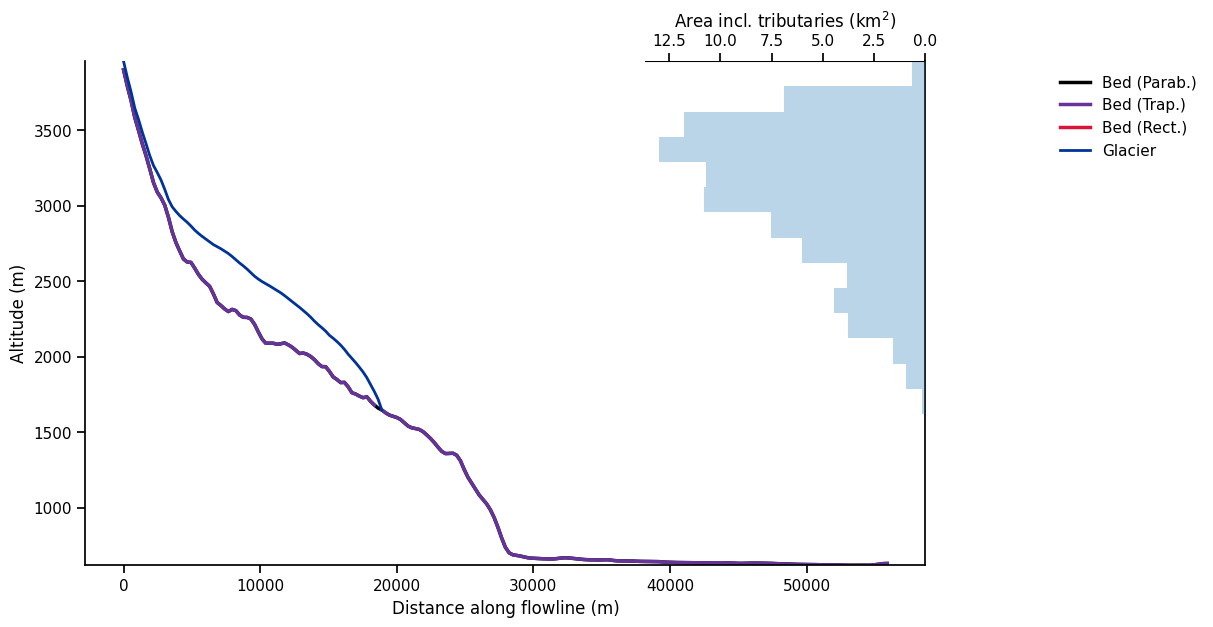

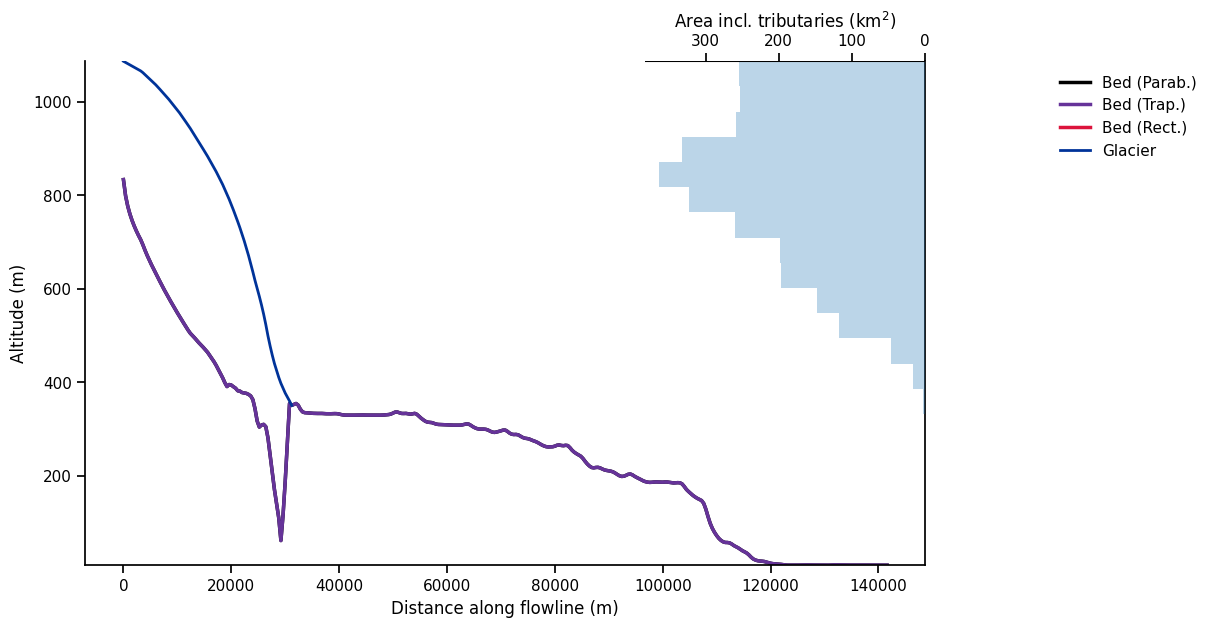

In [11]:
gdirs= workflow.init_glacier_directories(rgi_ids)

for gdir in gdirs:
    fls = gdir.read_pickle('model_flowlines')
    graphics.plot_modeloutput_section(fls);
    print(gdir.rgi_id,gdir.name)

In [13]:
oggm.cfg.PARAMS['temp_default_gradient'] = -0.0065

2025-04-09 15:33:02: oggm.cfg: PARAMS['temp_default_gradient'] changed from `-0.0055` to `-0.0065`.


In [14]:
tasks.run_with_hydro?

Signature:
tasks.run_with_hydro(
    gdir,
    run_task=None,
    store_monthly_hydro=False,
    fixed_geometry_spinup_yr=None,
    ref_area_from_y0=False,
    ref_area_yr=None,
    ref_geometry_filesuffix=None,
    **kwargs,
)
Docstring:
Run the flowline model and add hydro diagnostics.

TODOs:
    - Add the possibility to record MB during run to improve performance
      (requires change in API)
    - ...

Parameters
----------
run_task : func
    any of the `run_*`` tasks in the oggm.flowline module.
    The mass balance model used needs to have the `add_climate` output
    kwarg available though.
store_monthly_hydro : bool
    also compute monthly hydrological diagnostics. The monthly outputs
    are stored in 2D fields (years, months)
ref_area_yr : int
    the hydrological output is computed over a reference area, which
    per default is the largest area covered by the glacier in the simulation
    period. Use this kwarg to force a specific area to the state of the
    glacier at

2025-04-09 11:00:14: oggm.cfg: PARAMS['temp_default_gradient'] changed from `-0.0075` to `-0.0055`.
2025-04-09 11:00:14: oggm.sandbox.edu: InvalidWorkflowError occurred during task run_constant_climate_with_bias_spinup_-0.0055 on RGI60-11.01450: You seem to use different mass balance parameters than used for the calibration: you use cfg.PARAMS['temp_default_gradient']=-0.0055 while it was calibrated with cfg.PARAMS['temp_default_gradient']=-0.0065. Set `check_calib_params=False` to ignore this warning.
2025-04-09 11:00:14: oggm.core.flowline: InvalidWorkflowError occurred during task run_with_hydro_spinup_-0.0055 on RGI60-11.01450: You seem to use different mass balance parameters than used for the calibration: you use cfg.PARAMS['temp_default_gradient']=-0.0055 while it was calibrated with cfg.PARAMS['temp_default_gradient']=-0.0065. Set `check_calib_params=False` to ignore this warning.
2025-04-09 11:00:14: oggm.sandbox.edu: InvalidWorkflowError occurred during task run_constant_clim

RGI60-11.01450


2025-04-09 11:00:15: oggm.core.flowline: InvalidWorkflowError occurred during task run_with_hydro_spinup_-0.0055 on RGI60-11.01450: You seem to use different mass balance parameters than used for the calibration: you use cfg.PARAMS['temp_default_gradient']=-0.0055 while it was calibrated with cfg.PARAMS['temp_default_gradient']=-0.0065. Set `check_calib_params=False` to ignore this warning.
2025-04-09 11:00:15: oggm.sandbox.edu: InvalidWorkflowError occurred during task run_constant_climate_with_bias_spinup_-0.0055 on RGI60-11.01450: You seem to use different mass balance parameters than used for the calibration: you use cfg.PARAMS['temp_default_gradient']=-0.0055 while it was calibrated with cfg.PARAMS['temp_default_gradient']=-0.0065. Set `check_calib_params=False` to ignore this warning.
2025-04-09 11:00:15: oggm.core.flowline: InvalidWorkflowError occurred during task run_with_hydro_spinup_-0.0055 on RGI60-11.01450: You seem to use different mass balance parameters than used for th

rel_diff_v1/v0    100000
dtype: int64
RGI60-04.06187


2025-04-09 11:00:15: oggm.sandbox.edu: InvalidWorkflowError occurred during task run_constant_climate_with_bias_spinup_-0.0055 on RGI60-04.06187: You seem to use different mass balance parameters than used for the calibration: you use cfg.PARAMS['temp_default_gradient']=-0.0055 while it was calibrated with cfg.PARAMS['temp_default_gradient']=-0.0065. Set `check_calib_params=False` to ignore this warning.
2025-04-09 11:00:15: oggm.core.flowline: InvalidWorkflowError occurred during task run_with_hydro_spinup_-0.0055 on RGI60-04.06187: You seem to use different mass balance parameters than used for the calibration: you use cfg.PARAMS['temp_default_gradient']=-0.0055 while it was calibrated with cfg.PARAMS['temp_default_gradient']=-0.0065. Set `check_calib_params=False` to ignore this warning.
2025-04-09 11:00:15: oggm.sandbox.edu: InvalidWorkflowError occurred during task run_constant_climate_with_bias_spinup_-0.0055 on RGI60-04.06187: You seem to use different mass balance parameters th

rel_diff_v1/v0    100000
dtype: int64
RGI60-11.01450
RGI60-11.01450 -  need temperature bias of -2.4°C to get into steady state with similarvolume as volume from inventory date


InvalidWorkflowError: You seem to use different mass balance parameters than used for the calibration: you use cfg.PARAMS['temp_default_gradient']=-0.0055 while it was calibrated with cfg.PARAMS['temp_default_gradient']=-0.0065. Set `check_calib_params=False` to ignore this warning.

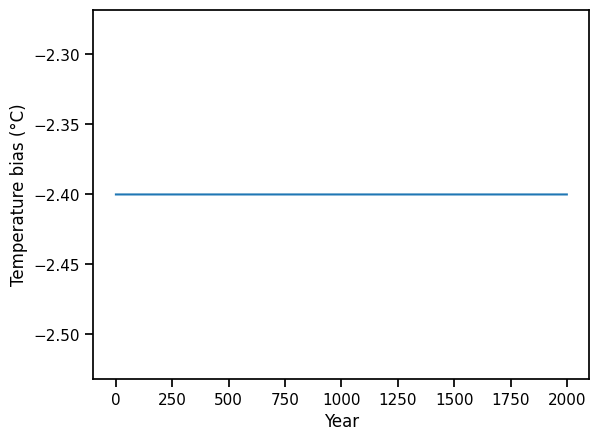

In [12]:
# this takes very long!!!
if run_spinup:
    for prcp_fac_mult in [0.5,2]:
        #oggm.cfg.PARAMS['temp_default_gradient'] =  temp_grad
        #if run_spinup: 
        pert = f'_{temp_grad}'

        dict_delta_t_rgi_eq = {}
        file_id = f'_spinup{pert}'
        # it does not need to be in perfect equilibrium to select the delta_t, but can still take up to 2000 years for the very slow glacier
        years = np.arange(2000) 
    
        for gdir, _r in zip(gdirs, rgi_ids):
            dict_delta_t = {}
            print(gdir.rgi_id)
            for delta_t in np.arange(-2.4,0.3,0.05): # this might need to be adapted for other glaciers 
                # We are using the task run_with_hydro to store hydrological outputs along with the usual glaciological outputs
                try:
                    temp_bias_ts = pd.Series(years * 0. + delta_t, index=years)
                    tasks.run_with_hydro(gdir,  # Run on the selected glacier
                                         temp_bias_ts=temp_bias_ts,  # applied temp.bias on top of the applied climate
                                         run_task=run_constant_climate_with_bias,  # which climate scenario? 
                                         y0=2009, halfsize=10,  # Period which we will average and constantly repeat
                                         store_monthly_hydro=True,  # Monthly outputs provide additional information
                                         output_filesuffix=file_id);  # an identifier for the output file, to read it later
                    with xr.open_dataset(gdir.get_filepath('model_diagnostics', filesuffix=file_id)) as ds:
                        # The last step of hydrological output is NaN (we can't compute it for this year)
                        # at year 0, the volume is near to the inventory date
                        ds = ds.isel(time=slice(0, -1)).load()
                        ratio = np.abs(1 - ds.volume_m3.isel(time=-1)/ds.volume_m3.isel(time=0)).values
                        if ds.isel(time=-1).volume_m3<0.7*ds.volume_m3.isel(time=0):
                            # we can stop, we don't need to look for even warmer temperatures... 
                            print(gdir.rgi_id, delta_t)
                            break 
                    print(delta_t)
                except:
                    ratio = 100000
                dict_delta_t[delta_t.round(2)] = ratio
            pd_delta_t = pd.DataFrame(dict_delta_t, index = ['rel_diff_v1/v0']).T
            print(pd_delta_t.min())
            delta_t_eq = pd_delta_t.idxmin().values[0]
            dict_delta_t_rgi_eq[f'{gdir.rgi_id}{pert}'] = delta_t_eq
        
        
        ### spinup 
        for gdir in gdirs:
            print(gdir.rgi_id)
            delta_t_eq = dict_delta_t_rgi_eq[f'{gdir.rgi_id}{pert}']
            print(f'{gdir.rgi_id} - {gdir.name} need temperature bias of {delta_t_eq}°C to get into steady state with similar'
                  'volume as volume from inventory date')
            #with plt.xkcd():
            delta_t = delta_t_eq
            years = np.arange(2000) # 1000 use longer time series to make sure it is in steady-state ... 
            temp_bias_ts = pd.Series(years * 0. + delta_t, index=years)
            temp_bias_ts.plot(); plt.xlabel('Year'); plt.ylabel('Temperature bias (°C)');
    
            # file identifier where the model output is saved
            file_id = f'_spinup{pert}'
    
            # We are using the task run_with_hydro to store hydrological outputs along with the usual glaciological outputs
            tasks.run_with_hydro(gdir,  # Run on the selected glacier
                                 temp_bias_ts=temp_bias_ts,  # the temperature bias to apply to the average climate
                                 run_task=run_constant_climate_with_bias,  # which climate scenario? See following notebook for other examples
                                 y0=2009, halfsize=10,  # Period which we will average and constantly repeat
                                 store_monthly_hydro=True,  # Monthly ouptuts provide additional information
                                 output_filesuffix=file_id);  # an identifier for the output file, to read it later
        # save temperature bias for steady states of the glaciers in JSON string
        with open('data_idealised_exps_preprocessing/idealised_equilibrium_temp_bias_pert.json', 'w') as outfile:
            json_string = json.dumps(dict_delta_t_rgi_eq)
            outfile.write(json_string)
    else:
        # necessary temperature bias for steady states of the glaciers
        with open('data_idealised_exps_preprocessing/idealised_equilibrium_temp_bias_pert.json') as json_file:
            dict_delta_t_rgi_eq = json.load(json_file)
            print(dict_delta_t_rgi_eq)